In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety
# Zostawiamy tym razem wszystkie cechy - będziemy próbować odgadnąć które cechy są najważniejsze
X = iris.data
y = iris.target

# Inicjalizacja. Można od razu wypełnić n_components, wykorzystujemy wszystkie cechy 
# pca = PCA(n_components=3)

pca = PCA()
pca.fit(X)

# Analiza (dekompozycja) PCA tworzy nam n nowych "sztucznych" cech, które starają się jak najlepiej 
# odzwierciedlić zmienność oryginalnego zbioru
print("Liczba komponentów: ", pca.n_components_)

# Dodatkowo możemy sprawdzić jaki wpływ nasze oryginalne cechy mają na wywnioskowane, nowe cechy
print("Skład nowych cech:")
print(pca.components_)

# Na koniec możemy określić które nowe, wywnioskowane cechy mają największy wpływ na ogólną zmienność zbioru
print(pca.explained_variance_ratio_)


Liczba komponentów:  4
Skład nowych cech:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
[0.92461872 0.05306648 0.01710261 0.00521218]


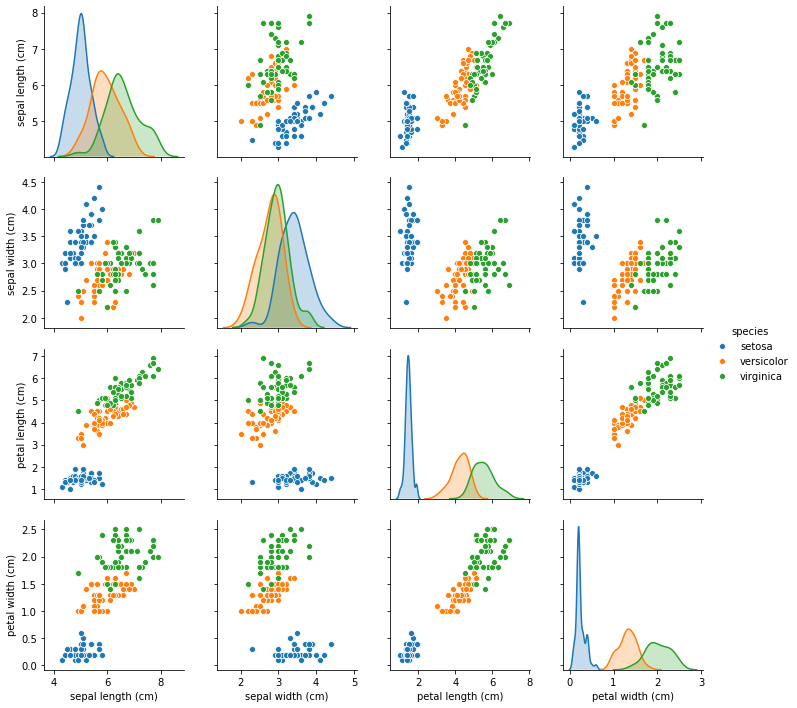

In [2]:
# Jedna *nowa* cecha tłumaczy prawie wszystko? Sprawdźmy!
# Czy potrafisz określić kierunki największej zmienności danych?

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

In [12]:
# Spróbujmy zredukować nasz zbiór cech do tej jednej, najlepszej

pca_limit = PCA(n_components = 1)

X_new = pca_limit.fit_transform(X)

# Cechy:
print("Liczba komponentów: ", pca_limit.n_components)

# Wpływ oryginalnych cech na wywnioskowaną cechę
print("Skład nowej cechy:")
print(pca_limit.components_)

# "Wytłumaczalność" nowej cechy dalej jest bardzo wysoka
print(pca_limit.explained_variance_ratio_)

Liczba komponentów:  1
Skład nowej cechy:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]
[0.92461872]


In [13]:
# Po użyciu funkcji transform (lub fit_transform) dekompozycja pozostawiła nam tylko liczbę cech, którą skonfigurowaliśmy
# Dodatkowo została od nich odjęta średnia, więc dane zawierają tylko wariancję

X_new[:5]

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654]])

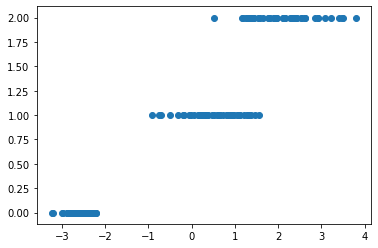

In [14]:
plt.scatter(X_new, y)
plt.show()

In [ ]:
# Zadanie 1:
# Wyjaśnij w kilku zdaniach jaka cecha została wywnioskowana przez PCA i co ona intuicyjnie mogłaby oznaczać


# Metoda PCA wywnioskowała, że najbardziej istotnymi cechami jest długość płatka oraz jego szerokość. Te cechy mają największy
# wpływ na prawidłową klasyfikację.



# Zadanie bonus: przeprowadź dekompozycję PCA na wybranym przez siebie innym zbiorze danych